In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Challenge

As you may remember: we made this diagram by plotting each of our 240 stars according to the log of its temperature and luminosity. The result doesn't look random. It reveals various groupings of stars:

One along the top where luminosity doesn't appear to be related to temperature. There's almost a flat line. (Giants)
Another group near the bottom, where there is perhaps a gentle slope, where cooler stars are slightly less bright. (White dwarves)
A line of stars from top left to bottom right, where cooler stars are definitely less bright. (Main sequence)
A clump of stars at the end of the above line. (Brown dwarves)
The colour coding in our version of the diagram doesn't show this. Our colour coding is based on spectral class rather than the types named above. Can you create another column to marks stars in the four given groups? Then make a version of the diagram with better colour coding.

Think about how you would identify stars in those groups from the data that is already there. Use pandas. Don't go through the csv file one row at a time!

![HR-diagram.png](HR-diagram.png)

#### Initial plan
* Create a column that groups ups the stars on Giants, White dwarves, Main sequence and Brown dwarves
* To do this we will need to create a filter for each category 
* For giants we will need to group the ones at the top with high luminosity so maybe luminosity > 10
* For white dwarves we can filter if temperature is <= 8.3 but luminosity is <= -5
* For Main sequence this would be a bit tricky - wonder if we can use correlation coefficient value? If not maybe we will have to take any stars that are leftover from the other 3 categories
* For brown dwarves, filter with temperature >= 8.5 and luminosity below -2.5


* Once the new column let's say star type is created and all filled -> check if there is any nan value
* If no nan values then we can recreate the HR diagram with the label on the stars type instead of the spectral class


In [3]:
file = pd.read_csv("Stars.csv")

stars = pd.DataFrame(file)

stars.head()

,Temperature,Luminosity,Radius,Abs_magnitude,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [80]:
# Create a column Stage and fill with nan values

stars['Stage'] = np.nan

stars['Stage'].isnull().sum()

240

In [81]:
# Make a log column each for temperature and luminosity

stars['log_temperature'] = np.log(stars['Temperature'])
stars['log_luminosity'] = np.log(stars['Luminosity'])

In [82]:
stars['log_temperature'].describe()

count    240.000000
mean       8.880989
std        0.857104
min        7.569928
25%        8.114998
50%        8.661458
75%        9.619463
max       10.596635
Name: log_temperature, dtype: float64

In [83]:
stars['log_luminosity'].describe()

count    240.000000
mean       1.628181
std        9.127495
min       -9.433484
25%       -7.053126
50%       -2.673754
75%       12.196275
max       13.652309
Name: log_luminosity, dtype: float64

In [84]:
stars.loc[stars['log_luminosity'] >= 11, 'Stage'] = 'Giant'
stars[stars['Stage'] == 'Giant']

/var/folders/xb/mvsqsvhs72x7xp8cjgv_8h3m0000gn/T/ipykernel_54606/3668146628.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Giant' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stars.loc[stars['log_luminosity'] >= 11, 'Stage'] = 'Giant'


,Temperature,Luminosity,Radius,Abs_magnitude,Color,Spectral_Class,Type,Stage,log_temperature,log_luminosity
30,39000,204000.0,10.6,-4.70,Blue,O,3,Giant,10.571317,12.225875
40,3826,200000.0,19.0,-6.93,Red,M,4,Giant,8.249575,12.206073
41,3365,340000.0,23.0,-6.20,Red,M,4,Giant,8.121183,12.736701
42,3270,150000.0,88.0,-6.02,Red,M,4,Giant,8.092545,11.918391
43,3200,195000.0,17.0,-7.22,Red,M,4,Giant,8.070906,12.180755
...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.0,1356.0,-9.93,Blue,O,5,Giant,10.569777,12.834228
236,30839,834042.0,1194.0,-10.63,Blue,O,5,Giant,10.336535,13.634039
237,8829,537493.0,1423.0,-10.73,White,A,5,Giant,9.085797,13.194671
238,9235,404940.0,1112.0,-11.23,White,A,5,Giant,9.130756,12.911494


In [85]:
stars[stars['Stage'] == 'Giant'].count()

Temperature        86
Luminosity         86
Radius             86
Abs_magnitude      86
Color              86
Spectral_Class     86
Type               86
Stage              86
log_temperature    86
log_luminosity     86
dtype: int64

* For white dwarves we can filter if temperature is <= 8.3 but luminosity is <= -5

In [86]:
stars.loc[(stars['log_temperature'] <= 8.3) & (stars['log_luminosity'] <= -5), 'Stage'] = 'White Dwarf'
stars[stars['Stage'] == 'White Dwarf']

,Temperature,Luminosity,Radius,Abs_magnitude,Color,Spectral_Class,Type,Stage,log_temperature,log_luminosity
0,3068,0.002400,0.1700,16.120,Red,M,0,White Dwarf,8.028781,-6.032287
1,3042,0.000500,0.1542,16.600,Red,M,0,White Dwarf,8.020270,-7.600902
2,2600,0.000300,0.1020,18.700,Red,M,0,White Dwarf,7.863267,-8.111728
3,2800,0.000200,0.1600,16.650,Red,M,0,White Dwarf,7.937375,-8.517193
4,1939,0.000138,0.1030,20.060,Red,M,0,White Dwarf,7.569928,-8.888257
...,...,...,...,...,...,...,...,...,...,...
195,3598,0.002700,0.6700,13.667,Red,M,1,White Dwarf,8.188133,-5.914504
196,3142,0.001320,0.2580,14.120,Red,M,1,White Dwarf,8.052615,-6.630124
197,3496,0.001250,0.3360,14.940,Red,M,1,White Dwarf,8.159375,-6.684612
198,3324,0.006500,0.4710,12.780,Red,M,1,White Dwarf,8.108924,-5.035953


In [87]:
stars[stars['Stage'] == 'White Dwarf'].count()

Temperature        70
Luminosity         70
Radius             70
Abs_magnitude      70
Color              70
Spectral_Class     70
Type               70
Stage              70
log_temperature    70
log_luminosity     70
dtype: int64

* For brown dwarves, filter with temperature >= 8.5 and luminosity below 3

In [88]:
stars.loc[(stars['log_temperature'] >= 8.5) & (stars['log_luminosity'] <= -2.5), 'Stage'] = 'Brown Dwarf'
stars[stars['Stage'] == 'Brown Dwarf']

,Temperature,Luminosity,Radius,Abs_magnitude,Color,Spectral_Class,Type,Stage,log_temperature,log_luminosity
20,25000,0.056000,0.00840,10.58,Blue-white,B,2,Brown Dwarf,10.126631,-2.882404
21,7740,0.000490,0.01234,14.02,White,A,2,Brown Dwarf,8.954157,-7.621105
22,7220,0.000170,0.01100,14.23,White,F,2,Brown Dwarf,8.884610,-8.679712
23,8500,0.000500,0.01000,14.50,White,A,2,Brown Dwarf,9.047821,-7.600902
24,16500,0.013000,0.01400,11.89,Blue-white,B,2,Brown Dwarf,9.711116,-4.342806
25,12990,0.000085,0.00984,12.23,Yellowish White,F,2,Brown Dwarf,9.471935,-9.372859
26,8570,0.000810,0.00970,14.20,Blue-white,A,2,Brown Dwarf,9.056023,-7.118476
27,7700,0.000110,0.01280,14.47,Yellowish White,F,2,Brown Dwarf,8.948976,-9.115030
28,11790,0.000150,0.01100,12.59,Yellowish White,F,2,Brown Dwarf,9.375007,-8.804875
29,7230,0.000080,0.01300,14.08,Pale yellow orange,F,2,Brown Dwarf,8.885994,-9.433484


In [89]:
stars[stars['Stage'] == 'Brown Dwarf'].count()

Temperature        40
Luminosity         40
Radius             40
Abs_magnitude      40
Color              40
Spectral_Class     40
Type               40
Stage              40
log_temperature    40
log_luminosity     40
dtype: int64

Check how many null values remain

In [90]:
stars['Stage'].isnull().sum()

44

In [91]:
# Total of giants, white dwarfs and brown dwarfs
total_filled = 86 + 70 + 40

In [92]:
# Expected remaining null values
240 - total_filled

44

In [93]:
stars['Stage'] = stars['Stage'].fillna('Main sequence')
stars[stars['Stage'] == 'Main sequence'].count()

Temperature        44
Luminosity         44
Radius             44
Abs_magnitude      44
Color              44
Spectral_Class     44
Type               44
Stage              44
log_temperature    44
log_luminosity     44
dtype: int64

In [95]:
stars['Stage'].isnull().sum()

0

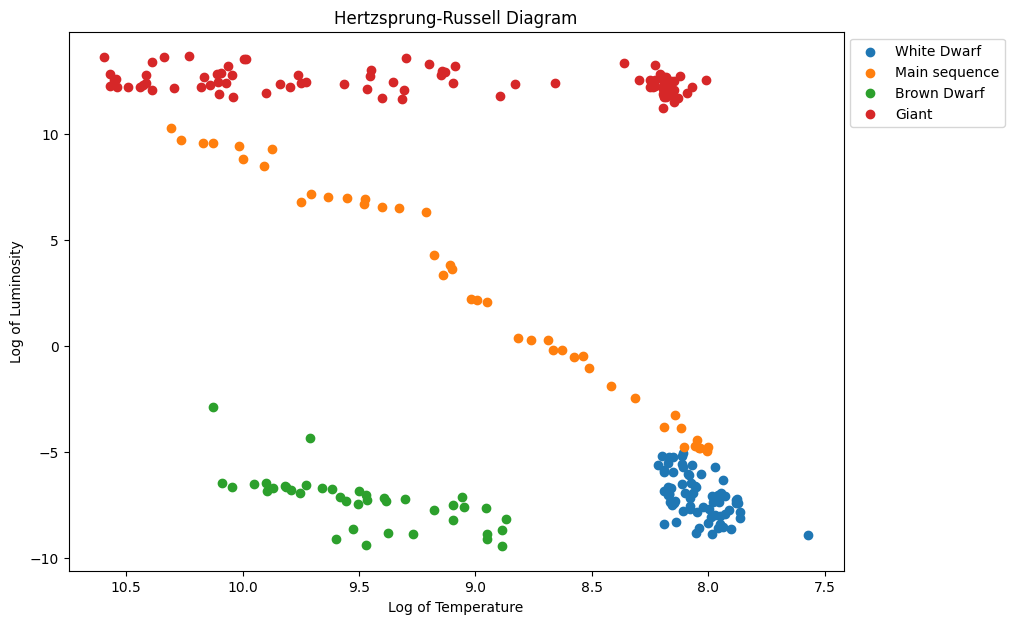

In [94]:
# Get unique values from stages
stages = stars['Stage'].unique().tolist()

# Filter the dataset by stage
stars_df_filtered = stars[stars['Stage'].isin(stages)]

# Create the scatter plot
plt.figure(figsize=(10, 7))

# Set the title and axis labels
plt.title('Hertzsprung-Russell Diagram')
plt.xlabel('Log of Temperature')
plt.ylabel('Log of Luminosity')

# Plot the data points
for stage in stages:
    stars_df_stage = stars_df_filtered[stars_df_filtered['Stage'] == stage]
    plt.scatter(stars_df_stage['log_temperature'], stars_df_stage['log_luminosity'], label=stage) 

# Invert the x-axis to go from 10.5 to 7.5
plt.gca().invert_xaxis()

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()